# Basic Plotting with matplotlib

You can show matplotlib figures directly in the notebook by using the `%matplotlib notebook` and `%matplotlib inline` magic commands. 

`%matplotlib notebook` provides an interactive environment.

In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [3]:
import matplotlib.pyplot as plt
plt.plot?

<IPython.core.display.Javascript object>


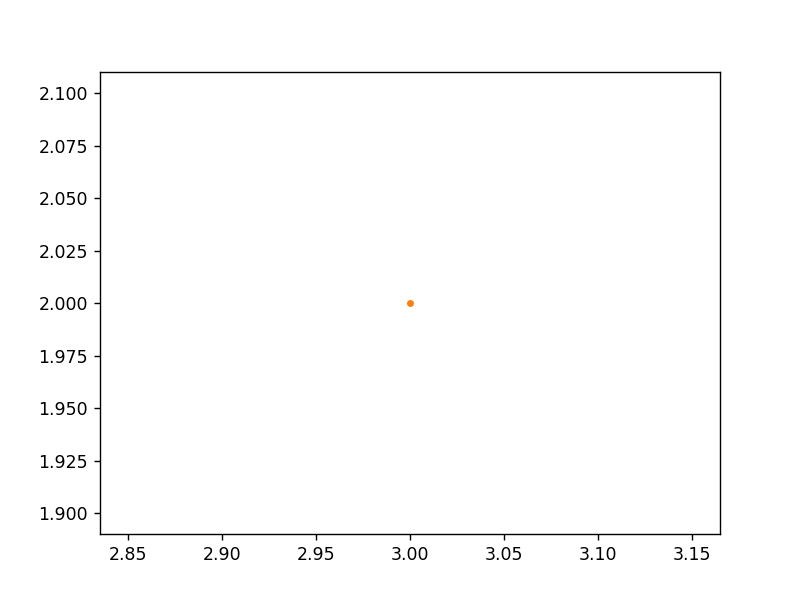

In [4]:
# because the default is the line style '-', 
# nothing will be shown if we only pass in one point (3,2)
plt.plot(3, 2)

In [5]:
# we can pass in '.' to plt.plot to indicate that we want
# the point (3,2) to be indicated with a marker '.'
plt.plot(3, 2, '.')

In [6]:
# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# create a new figure
fig = Figure()

# associate fig with the backend
canvas = FigureCanvasAgg(fig)

# add a subplot to the fig
ax = fig.add_subplot(111)

# plot the point (3,2)
ax.plot(3, 2, '.')

# save the figure to test.png
canvas.print_png('test.png')

We can use html cell magic to display the image.

In [7]:
%%html
<img src='test.png' />

<IPython.core.display.Javascript object>


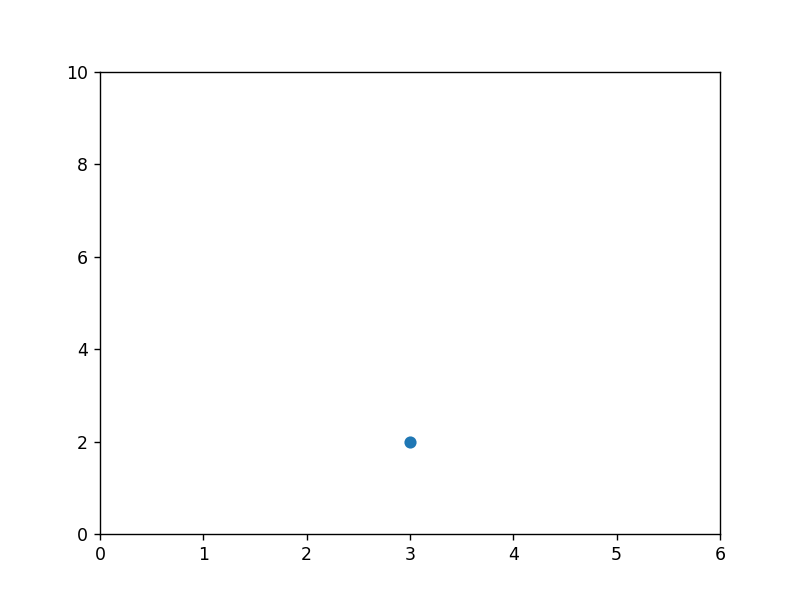

[0, 6, 0, 10]

In [8]:
# create a new figure
plt.figure()

# plot the point (3,2) using the circle marker
plt.plot(3, 2, 'o')

# get the current axes
ax = plt.gca()

# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0, 6, 0, 10])

<IPython.core.display.Javascript object>


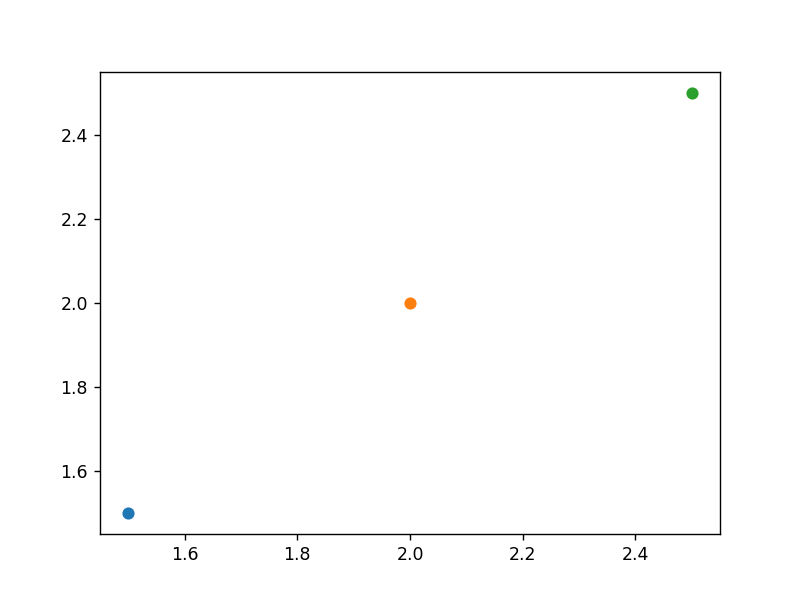

In [9]:
# create a new figure
plt.figure()

plt.plot(1.5, 1.5, 'o')
plt.plot(2, 2, 'o')
plt.plot(2.5, 2.5, 'o')

In [10]:
# get current axes
ax = plt.gca()
# get all the child objects the axes contains
ax.get_children()

 Text(0.5,1,''),
 Text(0,1,''),
 Text(1,1,''),

# Scatterplots

<IPython.core.display.Javascript object>


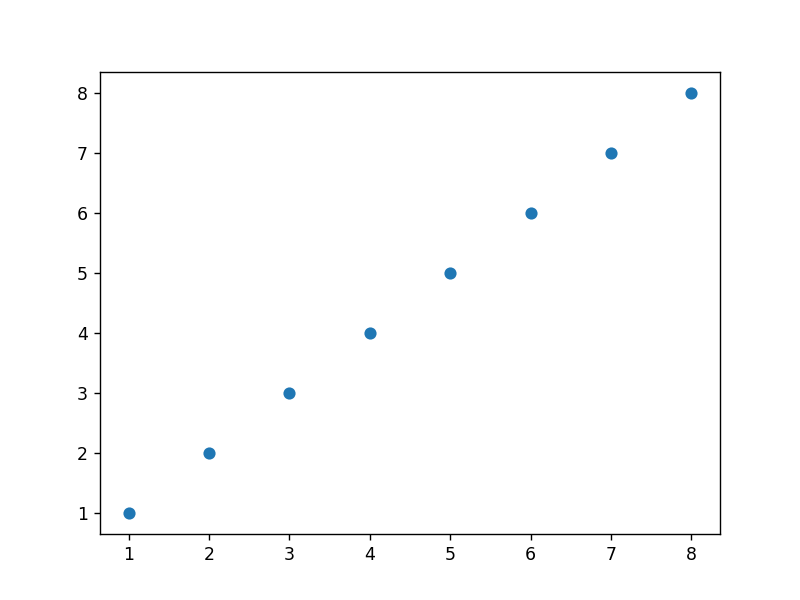

In [11]:
import numpy as np
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x

plt.figure()
plt.scatter(x, y) # similar to plt.plot(x, y, '.'), but the underlying child objects in the axes are not Line2D

<IPython.core.display.Javascript object>


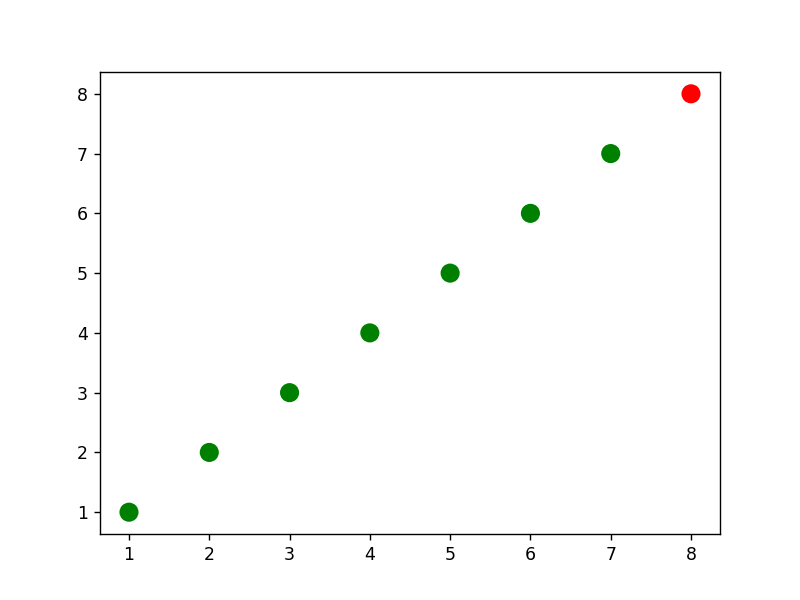

In [13]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x
colors = ['green']*(len(x) - 1)
colors.append('red')

plt.figure()

# plot the point with size 100 and chosen colors
plt.scatter(x, y, s=100, c=colors)

In [14]:
# convert the two lists into a list of pairwise tuples
zip_generator = zip([1, 2, 3, 4], [8, 7, 6, 5])
list(zip_generator)

[(1, 8), (2, 7), (3, 6), (4, 5)]

In [15]:
zip_generator = zip([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])

# The single star * unpacks a collection into positional arguments
x, y = zip(*zip_generator)
print(x)
print(y)

(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


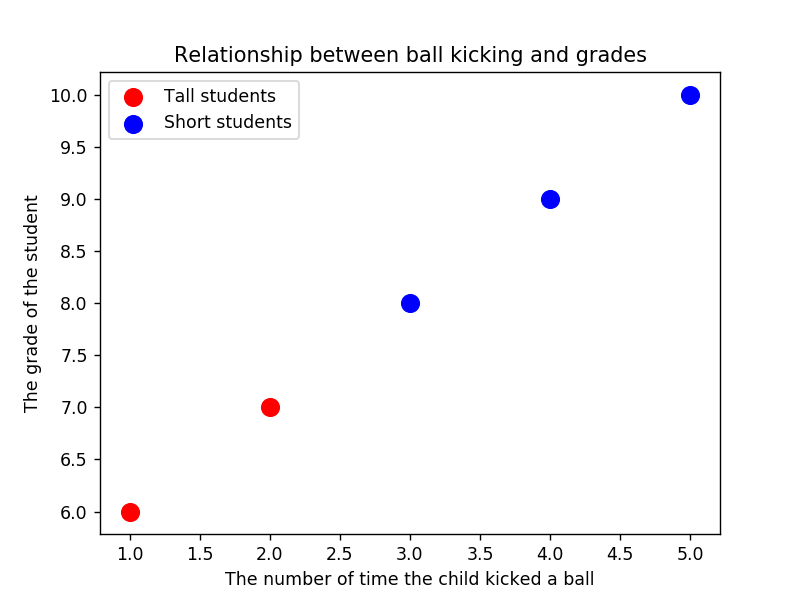

In [16]:
plt.figure()
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

In [17]:
plt.xlabel('The number of time the child kicked a ball')
plt.ylabel('The grade of the student')
plt.title('Relationship between ball kicking and grades')

Text(0.5,1,'Relationship between ball kicking and grades')

In [18]:
plt.legend()

In [26]:
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc=4, frameon=False, title='legend')

In [27]:
# get children from current axes (the legend is the second to last item in this list)
plt.gca().get_children()

 Text(0.5,1,'Relationship between ball kicking and grades'),
 Text(0,1,''),
 Text(1,1,''),

In [31]:
# you can use get_children to navigate through the child artists
plt.legend().get_children()[0].get_children()[1].get_children()[0].get_children()

In [29]:
# import the artist class from matplotlib
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  "*depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)
            
# Call this function on the legend artist to see what the legend is made up of            
rec_gc(plt.legend())

Legend
            Text(0,0,'None')
                        Text(0,0,'Tall students')
                        Text(0,0,'Short students')
    FancyBboxPatch(0,0;1x1)


# Line Plots

<IPython.core.display.Javascript object>


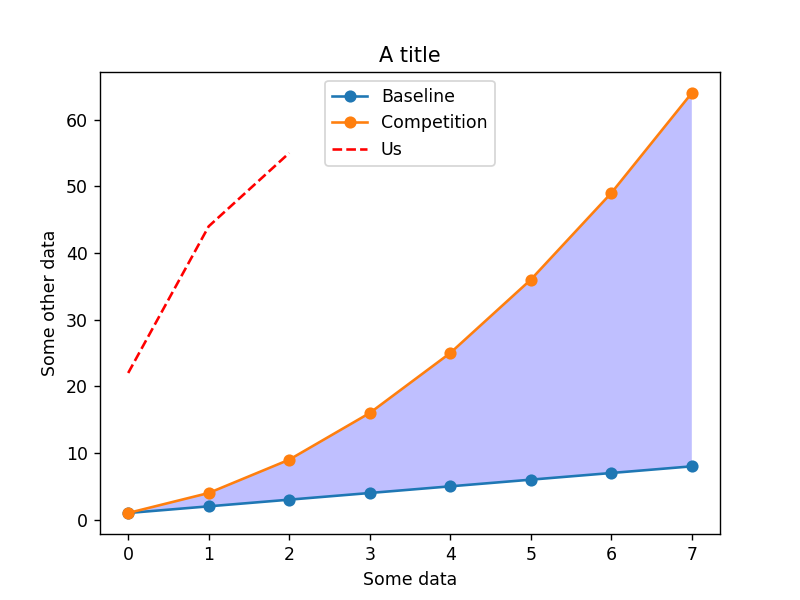

In [35]:
import numpy as np

linear_data = np.array([1, 2, 3, 4, 5, 6, 7, 8])
quadratic_data = linear_data**2

plt.figure()
plt.plot(linear_data, '-o', quadratic_data, '-o')

In [36]:
plt.plot([22, 44, 55], '--r')

In [37]:
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
plt.legend(['Baseline', 'Competition', 'Us'])

In [38]:
plt.gca().fill_between(range(len(linear_data)), linear_data, 
                      quadratic_data, facecolor='blue', alpha=0.25)

<IPython.core.display.Javascript object>


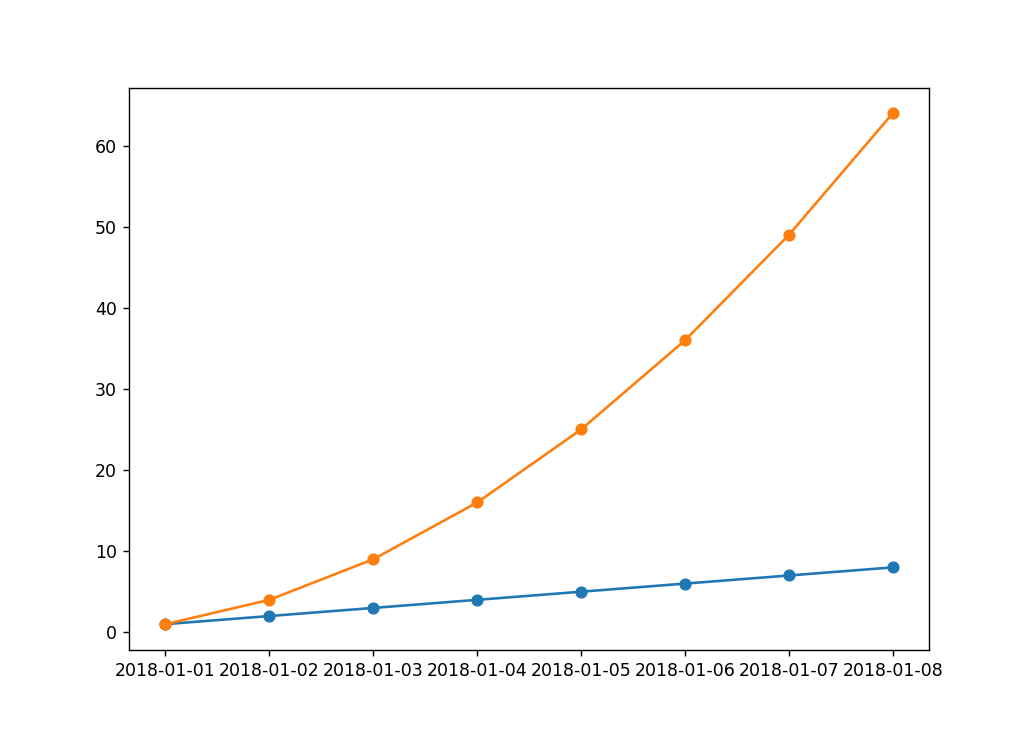

In [40]:
plt.figure()

observation_dates = np.arange('2018-01-01', '2018-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')

<IPython.core.display.Javascript object>


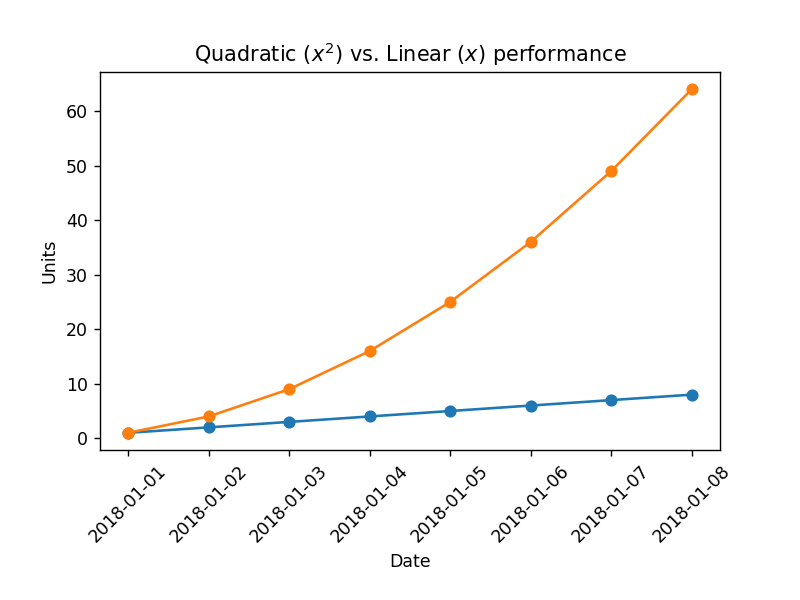

In [48]:
plt.figure()
observation_dates = np.arange('2018-01-01', '2018-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates))

plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')

In [49]:
x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)

In [50]:
plt.subplots_adjust(bottom=0.25)

In [51]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Quadratic vs. Linear performance')

Text(0.5,1,'Quadratic vs. Linear performance')

In [52]:
ax.set_title('Quadratic ($x^2$) vs. Linear ($x$) performance')

Text(0.5,1,'Quadratic ($x^2$) vs. Linear ($x$) performance')

# Bar Charts

<IPython.core.display.Javascript object>


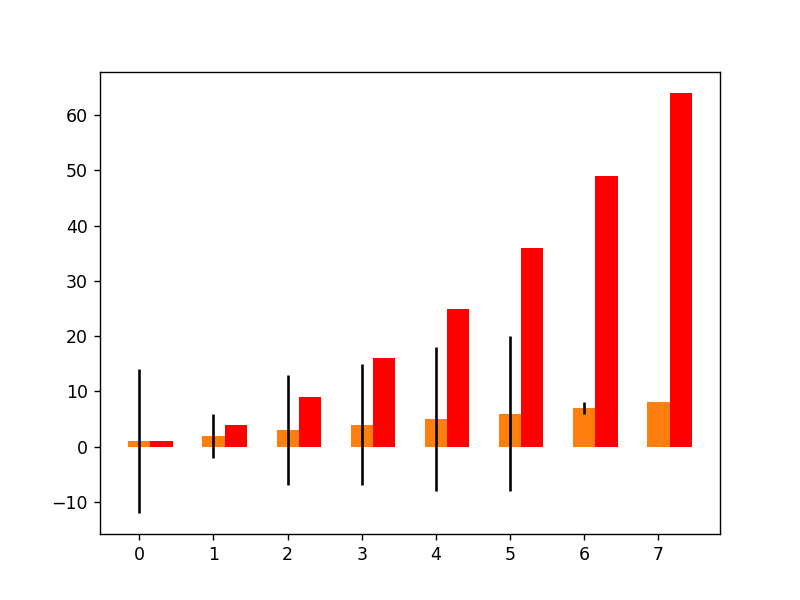

<BarContainer object of 8 artists>

In [53]:
plt.figure()

xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

In [54]:
new_xvals = []
for item in xvals:
    new_xvals.append(item+0.3)
    
plt.bar(new_xvals, quadratic_data, width = 0.3, color='red')

<BarContainer object of 8 artists>

In [55]:
from random import randint

linear_err = [randint(0, 15) for x in range(len(linear_data))]
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

<BarContainer object of 8 artists>

<IPython.core.display.Javascript object>


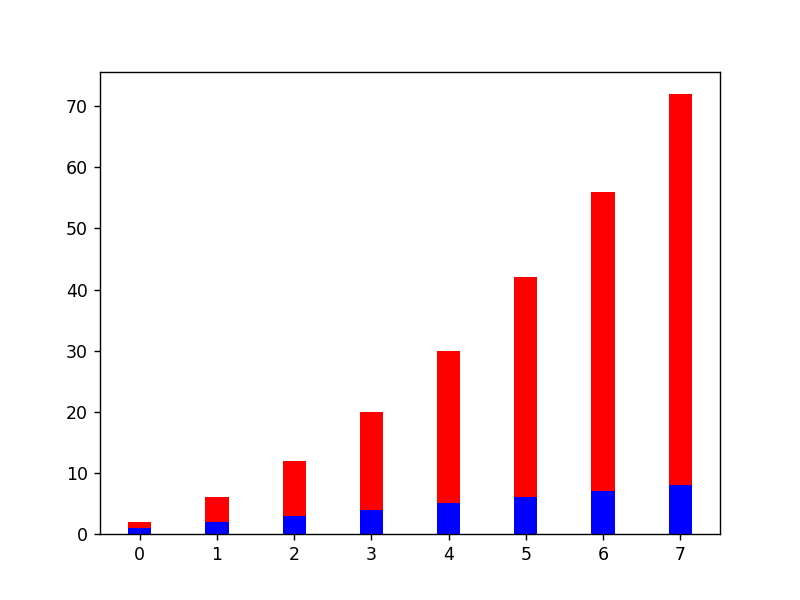

<BarContainer object of 8 artists>

In [57]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, quadratic_data, width = 0.3, bottom=linear_data, color='r')

<IPython.core.display.Javascript object>


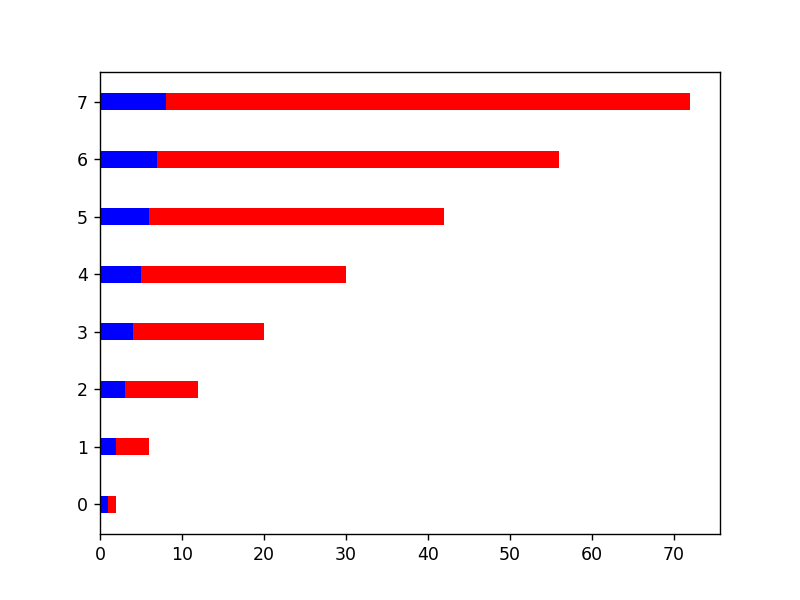

<BarContainer object of 8 artists>

In [58]:
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, quadratic_data, height = 0.3, left=linear_data, color='r')